In [2]:
# Import necessary packages

import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.colors as colors
import seaborn as sn

# Random seed
np.random.seed(0)

In [3]:
# Load dataset
birch3 = pd.read_csv("http://cs.joensuu.fi/sipu/datasets/birch3.txt", engine='python', sep='\s+', 
                        names=['vec_1', 'vec_2'])
birch3.head()

,vec_1,vec_2
0,118879,887164
1,118415,867117
2,118274,902572
3,117577,883724
4,117036,884249


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The birch3 dataset'}>

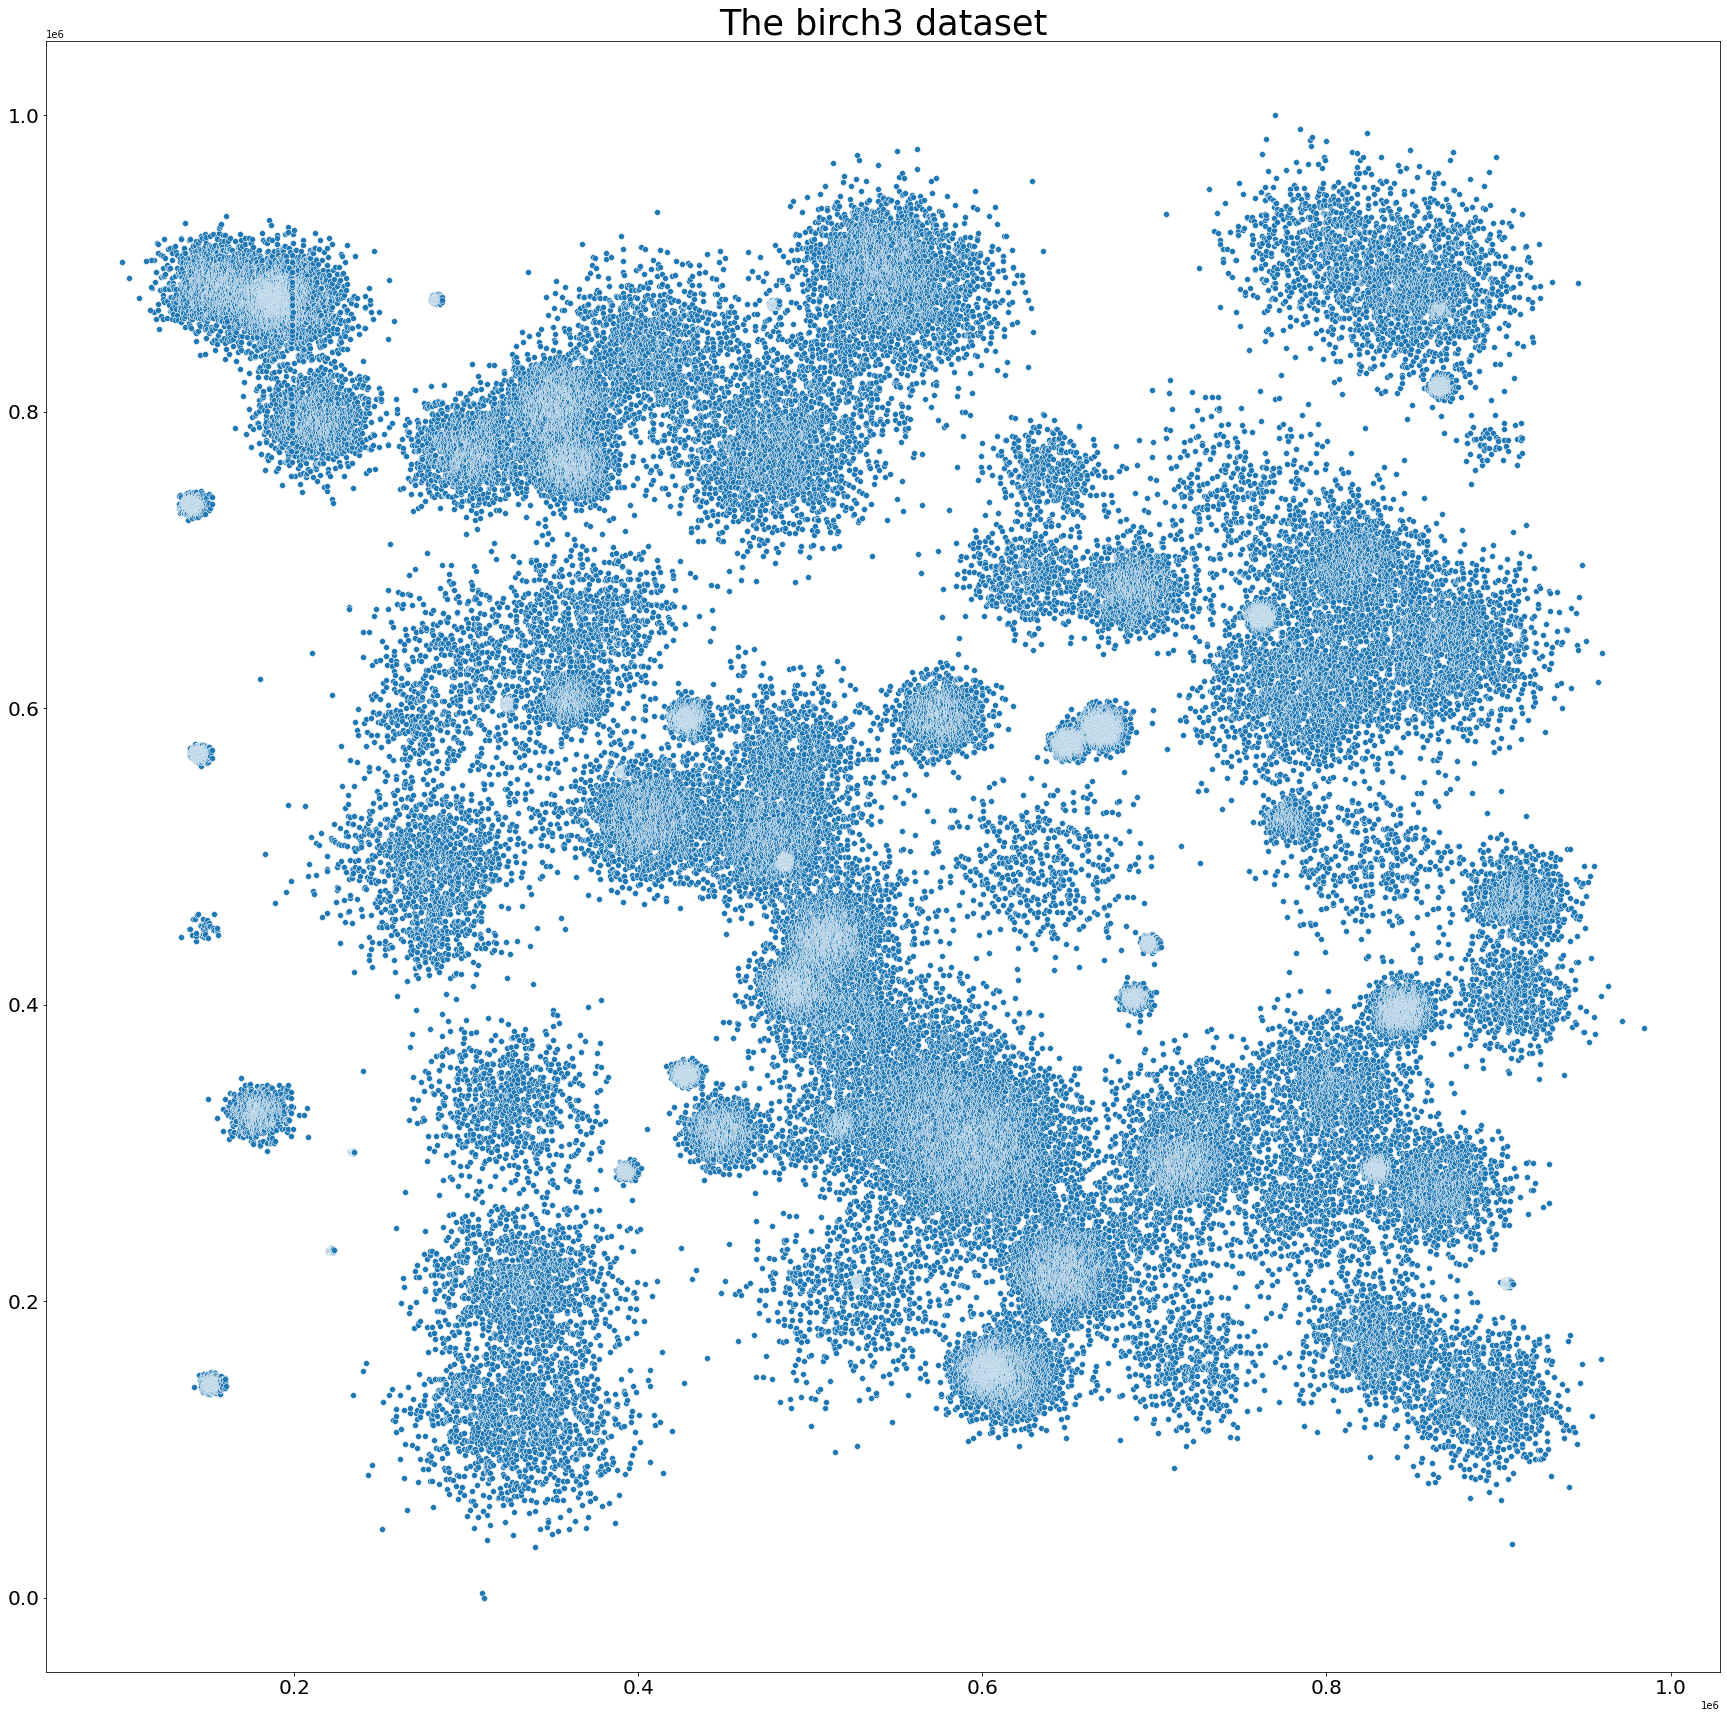

In [12]:
# Visualize the dataset to see what the clusters look like
birch3_vector = birch3.to_numpy()
plt.figure(figsize=(30, 30))
plt.title('The birch3 dataset', size=35)
plt.xticks(size=20)
plt.yticks(size=20)
sn.scatterplot(birch3_vector[:, 0], birch3_vector[:, 1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


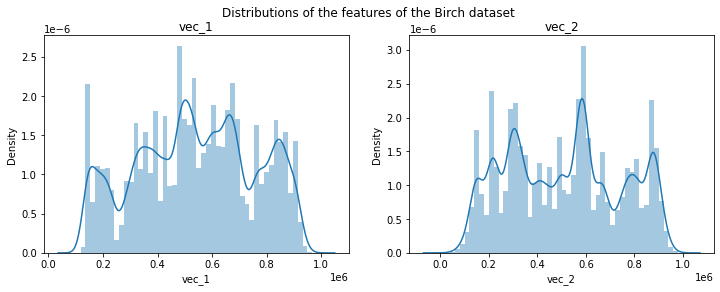

In [6]:
# Inspect distributions of the datasets
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Distributions of the features of the Birch dataset')

names = ['vec_1', 'vec_2']

for i in range(len(names)):
    sn.distplot(birch3[names[i]], ax=ax[i])
    ax[i].set_title(names[i])


In [13]:
# Normalize dataset for easier parameter selection
x = StandardScaler().fit_transform(birch3_vector)
x

array([[-1.95164735,  1.61398917],
       [-1.95379246,  1.52794581],
       [-1.95444431,  1.68012157],
       ...,
       [ 1.73440915,  1.72000789],
       [ 1.73444613, -0.51155274],
       [ 1.73467266, -0.10836316]])

n_clusters : 17


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (17) by BIRCH is less than (100). Decrease the threshold.
  warnings.warn(


n_clusters : 17


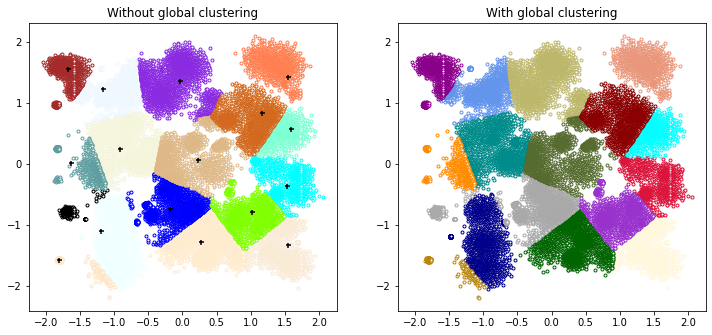

In [18]:
# Using birch clusters

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

birch_models = [cluster.Birch(n_clusters=None), cluster.Birch(n_clusters=100)]
titles = ["Without global clustering", "With global clustering"]

for i, (birch_model, title) in enumerate(zip(birch_models, titles)):
    ax = fig.add_subplot(1, 2, i + 1)
    birch_model.fit(x)
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = len(np.unique(labels))
    print("n_clusters : %d" % n_clusters)

    for centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(x[mask, 0], x[mask, 1], c='w', edgecolor=col, marker=".")
        if birch_model.n_clusters is None:
            ax.scatter(centroid[0], centroid[1], marker="+", c="k", s=25)
    
    ax.set_title(title)